In [442]:
CUTOFF = 10
DEPTH = 2

In [443]:
from sklearn import tree
import graphviz 
import numpy as np

In [444]:
with open("output_for_dt.csv", "r") as file:
  headers_str = next(file)
  data = np.loadtxt(file, delimiter=",")
print(data.shape)

(3154, 9)


In [445]:
# The decision tree doesn't show very small numbers well
for i in range(data.shape[1]):
  if max(data[:,i]) < 0.1:
    data[:,i] *= 1e6

In [446]:
X = data[:, :-1]
Y = data[:, -1:]
Y = (Y >= CUTOFF).astype(int)
print(X.shape)
print(Y.shape)

(3154, 8)
(3154, 1)


In [447]:
headers = headers_str.split(",")[:-1]
len(headers)

8

In [448]:
clf = tree.DecisionTreeClassifier(max_depth=DEPTH, criterion='entropy')
clf = clf.fit(X, Y)

In [449]:
# tree.plot_tree(clf) 

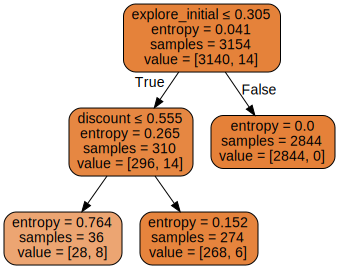

In [450]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=headers,  
                      filled=True, rounded=True,  
                      special_characters=True)  

graph = graphviz.Source(dot_data)
# graph.render(f"{CUTOFF}-{DEPTH}") # Saves to PDF
graph